In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from shapely.geometry import Point
#import plotly.express as px

In [2]:
permits = pd.read_csv("Street_Construction_Permits__2022-Present_.csv")
permits.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,PermitNumberOfZones,PermitLinearFeet,PermitTotalSqFeet,PermitEstimatedNumberOfCuts,EquipmentTypeDesc,NumberOfContainers,NumberOfMiniContainers,SpecificStipulations,PreviousPermitNumber,NextPermitNumber,EmergencyIssueDate,PermitIssueDate,IssuedWorkStartDate,IssuedWorkEndDate,BoroughName,PermitHouseNumber,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn,OFTCode
0,B012018340C93,2.018121e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0135P,FINAL RESTORATION ONLY - PROTECTED,1.0,23.0,NaN,NaN,NaN,NaN,NaN,JN,NaN,NaN,NaN,12/06/2018 03:40:50 PM,12/07/2018 12:00:00 AM,01/05/2019 11:59:59 PM,BROOKLYN,1574,73 STREET,15 AVENUE,16 AVENUE,CONSOLIDATED EDISON,nyp ps-0020804,NaN,NaN,CONCRETE,12/06/2018 03:40:50 PM,04/24/2022 12:05:16 AM,310230306580306688.0
1,B012018348A37,2.018121e+15,7.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0120,TREE PITS,1.0,100.0,NaN,NaN,NaN,NaN,NaN,ALL WORK AS PER CEC-12-158,NaN,NaN,NaN,12/14/2018 09:51:51 AM,12/14/2018 09:51:51 AM,12/31/2018 11:59:59 PM,BROOKLYN,44,KENT STREET,BODY OF WATER,WEST STREET,J. PIZZIRUSSO LANDSCAPING CORP.,install tree pit,NaN,NaN,CONCRETE,12/14/2018 09:51:51 AM,01/01/2022 12:05:34 AM,354010376950392448.0
2,B012018348A65,2.018121e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0132,INSTALL FENCE,1.0,20.0,2500.0,6.0,NaN,NaN,NaN,NW,NaN,NaN,NaN,12/14/2018 11:18:47 AM,12/14/2018 11:18:47 AM,12/31/2018 11:59:59 PM,BROOKLYN,815,5 AVENUE,33 STREET,34 STREET,B&M CLEANUP SERVICES INC.,NaN,NaN,NaN,CONCRETE,12/14/2018 11:18:47 AM,01/01/2022 12:05:34 AM,305580308230308288.0
3,B012018354A65,2.018122e+15,8.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0120,TREE PITS,1.0,200.0,NaN,NaN,NaN,NaN,NaN,ALL WORK AS PER CEC-12-158,NaN,NaN,NaN,12/20/2018 08:02:22 AM,12/20/2018 08:02:22 AM,12/31/2018 11:59:59 PM,BROOKLYN,6633,17 AVENUE,66 STREET,67 STREET,ROBERT BELLO LANDSCAPE SERVICE INC.,NaN,NaN,NaN,CONCRETE,12/20/2018 08:02:22 AM,01/01/2022 12:05:34 AM,306780309880309952.0
4,B012018360E54,2.018123e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0135,FINAL RESTORATION ONLY,1.0,56.0,NaN,NaN,NaN,NaN,NaN,DP,NaN,NaN,NaN,12/26/2018 04:30:16 PM,12/26/2018 04:30:16 PM,01/24/2019 11:59:59 PM,BROOKLYN,241,SCHENCK AVENUE,GLENMORE AVENUE,LIBERTY AVENUE,CONSOLIDATED EDISON,nyp ps-0021998,NaN,NaN,CONCRETE,12/26/2018 04:30:16 PM,01/25/2022 12:05:29 AM,375330344330355840.0


In [3]:
permits_gas = permits[permits['PermitTypeDesc'].str.contains('GAS')]
permits_gas.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,PermitNumberOfZones,PermitLinearFeet,PermitTotalSqFeet,PermitEstimatedNumberOfCuts,EquipmentTypeDesc,NumberOfContainers,NumberOfMiniContainers,SpecificStipulations,PreviousPermitNumber,NextPermitNumber,EmergencyIssueDate,PermitIssueDate,IssuedWorkStartDate,IssuedWorkEndDate,BoroughName,PermitHouseNumber,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn,OFTCode
85,B012022147A39,2.022053e+15,1.0,Emergency,020,EXPIRED UNDER GUARANTEE,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,IL.,NaN,NaN,05/27/2022 08:48:14 AM,05/31/2022 10:40:15 AM,05/27/2022 08:48:14 AM,06/25/2022 11:59:59 PM,BROOKLYN,938,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,THE BROOKLYN UNION GAS COMPANY D/B/A NATIONAL ...,Gas Leak Repair,NaN,ASPHALT,CONCRETE,05/27/2022 08:48:16 AM,06/26/2022 12:05:18 AM,323930319930345920.0
98,B012023026B30,2.023013e+15,1.0,Reissue,006,ISSUED & PRINTED,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,DP,B012022361B91,NaN,NaN,01/26/2023 02:47:09 PM,01/26/2023 02:47:09 PM,02/24/2023 11:59:59 PM,BROOKLYN,2081,SCHENECTADY AVENUE,AVENUE M,AVENUE N,THE BROOKLYN UNION GAS COMPANY D/B/A NATIONAL ...,Gas Leak Repair,NaN,ASPHALT,CONCRETE,01/26/2023 02:47:07 PM,01/26/2023 02:47:07 PM,NaN
198,M012019002C35,2.019010e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0103,MAJOR INSTALLATION - GAS,1.0,20.0,NaN,NaN,NaN,NaN,NaN,GC,NaN,NaN,NaN,01/02/2019 01:51:14 PM,01/03/2019 12:00:00 AM,04/02/2019 11:59:59 PM,MANHATTAN,37,WEST 44 STREET,5 AVENUE,6 AVENUE,CONSOLIDATED EDISON,Repair Gas,450' EEC of 6 Ave &amp; 4' SNC of W 44 St,ASPHALT,NaN,01/02/2019 01:51:14 PM,04/03/2022 12:05:17 AM,134650110410110512.0
200,M012019014C21,2.019011e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0103,MAJOR INSTALLATION - GAS,1.0,230.0,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,01/14/2019 03:15:52 PM,01/14/2019 03:15:52 PM,04/13/2019 11:59:59 PM,MANHATTAN,NaN,AVENUE B,EAST 6 STREET,EAST 7 STREET,CONSOLIDATED EDISON,GAS MAIN,1' NNC OF E 6 ST &amp; 8' EWC OF AVE B,ASPHALT,CONCRETE,01/14/2019 03:15:52 PM,04/14/2022 12:05:16 AM,112210117110117136.0
206,M012019136A27,2.019052e+15,1.0,Emergency,030,EXPIRED,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M012019161C10,05/16/2019 08:41:49 AM,05/22/2019 08:20:38 AM,05/16/2019 08:41:49 AM,06/14/2019 11:59:59 PM,MANHATTAN,NaN,1 AVENUE,EAST 30 STREET,EAST 33 STREET,CONSOLIDATED EDISON,Repair Gas Leak,barholing,ASPHALT,CONCRETE,05/16/2019 08:41:50 AM,06/15/2022 12:05:16 AM,110010117590117648.0


In [4]:
permits_gas["FromStreetName"].head()

85      BLEECKER STREET
98             AVENUE M
198            5 AVENUE
200    EAST    6 STREET
206    EAST   30 STREET
Name: FromStreetName, dtype: object

In [5]:
permits_gas.shape[0]/permits.shape[0]*100

16.497075554843363

- 16% of permits is for Gas related work 

In [6]:
permits_gas["ApplicationTypeShortDesc"].value_counts()

Renew                89280
New                  58006
Emergency            15638
Reissue              11824
Amend and Reissue     2597
Extend                1788
Name: ApplicationTypeShortDesc, dtype: int64

In [7]:
gas_length_permits = pd.pivot_table(
    permits_gas,
    values='PermitLinearFeet',
    index=['OnStreetName', 'BoroughName'],
    columns=['ApplicationTypeShortDesc'],
    aggfunc='sum'
)

In [8]:
gas_length_permits.head()

ApplicationTypeShortDesc   Amend and Reissue  Emergency  Extend     New  \
OnStreetName  BoroughName                                                 
1 AVENUE      BRONX                    190.0      300.0     NaN   214.0   
              BROOKLYN                   NaN        NaN     NaN  2319.0   
              MANHATTAN               1733.0      908.0    50.0  8851.0   
1 AVENUE LOOP MANHATTAN                  NaN        4.0     NaN     NaN   
1 COURT       BROOKLYN                   NaN        NaN     NaN    14.0   

ApplicationTypeShortDesc   Reissue    Renew  
OnStreetName  BoroughName                    
1 AVENUE      BRONX          208.0     30.0  
              BROOKLYN         NaN   5200.0  
              MANHATTAN      330.0  21410.0  
1 AVENUE LOOP MANHATTAN        NaN      NaN  
1 COURT       BROOKLYN         NaN     14.0

In [9]:
gas_length_permits.fillna(0,inplace=True)

In [10]:
gas_length_permits.reset_index(inplace=True)

In [11]:
gas_length_permits.head()

ApplicationTypeShortDesc,OnStreetName,BoroughName,Amend and Reissue,Emergency,Extend,New,Reissue,Renew
0,1 AVENUE,BRONX,190.0,300.0,0.0,214.0,208.0,30.0
1,1 AVENUE,BROOKLYN,0.0,0.0,0.0,2319.0,0.0,5200.0
2,1 AVENUE,MANHATTAN,1733.0,908.0,50.0,8851.0,330.0,21410.0
3,1 AVENUE LOOP,MANHATTAN,0.0,4.0,0.0,0.0,0.0,0.0
4,1 COURT,BROOKLYN,0.0,0.0,0.0,14.0,0.0,14.0


In [12]:
#gas_length_permits.to_csv("gas_length_permits.csv")

In [13]:
gas_renew_sorted = gas_length_permits.sort_values(by='Renew', ascending=False)
gas_renew_sorted.head(20)

ApplicationTypeShortDesc,OnStreetName,BoroughName,Amend and Reissue,Emergency,Extend,New,Reissue,Renew
2362,EAST 46 STREET,BROOKLYN,0.0,50.0,0.0,35891.0,12900.0,131037.0
1045,AVENUE L,BROOKLYN,1250.0,59.0,0.0,41034.0,4278.0,108990.0
1046,AVENUE M,BROOKLYN,3050.0,57.0,0.0,26415.0,5461.0,83595.0
2365,EAST 48 STREET,BROOKLYN,0.0,51.0,0.0,23284.0,307.0,82542.0
3320,HILLSIDE AVENUE,QUEENS,4039.0,215.0,0.0,20324.0,2548.0,79022.0
2333,EAST 31 STREET,BROOKLYN,0.0,106.0,5.0,27951.0,5704.0,77927.0
2349,EAST 39 STREET,BROOKLYN,0.0,9.0,0.0,21430.0,3008.0,71715.0
2351,EAST 40 STREET,BROOKLYN,0.0,35.0,0.0,14145.0,310.0,71107.0
2355,EAST 42 STREET,BROOKLYN,0.0,26.0,0.0,13520.0,5400.0,70104.0
2318,EAST 23 STREET,BROOKLYN,0.0,14.0,0.0,25518.0,5400.0,69878.0


In [14]:
gas_new_sorted = gas_length_permits.sort_values(by='New', ascending=False)
gas_new_sorted.head(20)

ApplicationTypeShortDesc,OnStreetName,BoroughName,Amend and Reissue,Emergency,Extend,New,Reissue,Renew
1301,BEDFORD AVENUE,BROOKLYN,262.0,85.0,0.0,45870.0,5942.0,65871.0
1045,AVENUE L,BROOKLYN,1250.0,59.0,0.0,41034.0,4278.0,108990.0
2362,EAST 46 STREET,BROOKLYN,0.0,50.0,0.0,35891.0,12900.0,131037.0
2345,EAST 37 STREET,BROOKLYN,0.0,33.0,300.0,33331.0,6600.0,60086.0
2309,EAST 18 STREET,BROOKLYN,7.0,20.0,0.0,32869.0,6030.0,54870.0
2297,EAST 12 STREET,BROOKLYN,0.0,31.0,4.0,32301.0,3605.0,47363.0
707,70 STREET,QUEENS,300.0,44.0,0.0,28535.0,7339.0,30985.0
2333,EAST 31 STREET,BROOKLYN,0.0,106.0,5.0,27951.0,5704.0,77927.0
4338,OCEAN PARKWAY,BROOKLYN,46.0,77.0,0.0,27335.0,5995.0,38212.0
2320,EAST 24 STREET,BROOKLYN,0.0,21.0,0.0,27100.0,4858.0,57326.0


In [15]:
gas_length_permits.shape

(6049, 8)

In [16]:
permits[permits["OnStreetName"]=="12 AVENUE"].shape

(1145, 37)

In [17]:
permits_gas.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,PermitNumberOfZones,PermitLinearFeet,PermitTotalSqFeet,PermitEstimatedNumberOfCuts,EquipmentTypeDesc,NumberOfContainers,NumberOfMiniContainers,SpecificStipulations,PreviousPermitNumber,NextPermitNumber,EmergencyIssueDate,PermitIssueDate,IssuedWorkStartDate,IssuedWorkEndDate,BoroughName,PermitHouseNumber,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn,OFTCode
85,B012022147A39,2.022053e+15,1.0,Emergency,020,EXPIRED UNDER GUARANTEE,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,IL.,NaN,NaN,05/27/2022 08:48:14 AM,05/31/2022 10:40:15 AM,05/27/2022 08:48:14 AM,06/25/2022 11:59:59 PM,BROOKLYN,938,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,THE BROOKLYN UNION GAS COMPANY D/B/A NATIONAL ...,Gas Leak Repair,NaN,ASPHALT,CONCRETE,05/27/2022 08:48:16 AM,06/26/2022 12:05:18 AM,323930319930345920.0
98,B012023026B30,2.023013e+15,1.0,Reissue,006,ISSUED & PRINTED,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,DP,B012022361B91,NaN,NaN,01/26/2023 02:47:09 PM,01/26/2023 02:47:09 PM,02/24/2023 11:59:59 PM,BROOKLYN,2081,SCHENECTADY AVENUE,AVENUE M,AVENUE N,THE BROOKLYN UNION GAS COMPANY D/B/A NATIONAL ...,Gas Leak Repair,NaN,ASPHALT,CONCRETE,01/26/2023 02:47:07 PM,01/26/2023 02:47:07 PM,NaN
198,M012019002C35,2.019010e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0103,MAJOR INSTALLATION - GAS,1.0,20.0,NaN,NaN,NaN,NaN,NaN,GC,NaN,NaN,NaN,01/02/2019 01:51:14 PM,01/03/2019 12:00:00 AM,04/02/2019 11:59:59 PM,MANHATTAN,37,WEST 44 STREET,5 AVENUE,6 AVENUE,CONSOLIDATED EDISON,Repair Gas,450' EEC of 6 Ave &amp; 4' SNC of W 44 St,ASPHALT,NaN,01/02/2019 01:51:14 PM,04/03/2022 12:05:17 AM,134650110410110512.0
200,M012019014C21,2.019011e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0103,MAJOR INSTALLATION - GAS,1.0,230.0,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,01/14/2019 03:15:52 PM,01/14/2019 03:15:52 PM,04/13/2019 11:59:59 PM,MANHATTAN,NaN,AVENUE B,EAST 6 STREET,EAST 7 STREET,CONSOLIDATED EDISON,GAS MAIN,1' NNC OF E 6 ST &amp; 8' EWC OF AVE B,ASPHALT,CONCRETE,01/14/2019 03:15:52 PM,04/14/2022 12:05:16 AM,112210117110117136.0
206,M012019136A27,2.019052e+15,1.0,Emergency,030,EXPIRED,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M012019161C10,05/16/2019 08:41:49 AM,05/22/2019 08:20:38 AM,05/16/2019 08:41:49 AM,06/14/2019 11:59:59 PM,MANHATTAN,NaN,1 AVENUE,EAST 30 STREET,EAST 33 STREET,CONSOLIDATED EDISON,Repair Gas Leak,barholing,ASPHALT,CONCRETE,05/16/2019 08:41:50 AM,06/15/2022 12:05:16 AM,110010117590117648.0


### Combining with streets shapefile

In [18]:
permits_gas.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,PermitNumberOfZones,PermitLinearFeet,PermitTotalSqFeet,PermitEstimatedNumberOfCuts,EquipmentTypeDesc,NumberOfContainers,NumberOfMiniContainers,SpecificStipulations,PreviousPermitNumber,NextPermitNumber,EmergencyIssueDate,PermitIssueDate,IssuedWorkStartDate,IssuedWorkEndDate,BoroughName,PermitHouseNumber,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn,OFTCode
85,B012022147A39,2.022053e+15,1.0,Emergency,020,EXPIRED UNDER GUARANTEE,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,IL.,NaN,NaN,05/27/2022 08:48:14 AM,05/31/2022 10:40:15 AM,05/27/2022 08:48:14 AM,06/25/2022 11:59:59 PM,BROOKLYN,938,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,THE BROOKLYN UNION GAS COMPANY D/B/A NATIONAL ...,Gas Leak Repair,NaN,ASPHALT,CONCRETE,05/27/2022 08:48:16 AM,06/26/2022 12:05:18 AM,323930319930345920.0
98,B012023026B30,2.023013e+15,1.0,Reissue,006,ISSUED & PRINTED,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,1.0,NaN,NaN,NaN,NaN,NaN,DP,B012022361B91,NaN,NaN,01/26/2023 02:47:09 PM,01/26/2023 02:47:09 PM,02/24/2023 11:59:59 PM,BROOKLYN,2081,SCHENECTADY AVENUE,AVENUE M,AVENUE N,THE BROOKLYN UNION GAS COMPANY D/B/A NATIONAL ...,Gas Leak Repair,NaN,ASPHALT,CONCRETE,01/26/2023 02:47:07 PM,01/26/2023 02:47:07 PM,NaN
198,M012019002C35,2.019010e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0103,MAJOR INSTALLATION - GAS,1.0,20.0,NaN,NaN,NaN,NaN,NaN,GC,NaN,NaN,NaN,01/02/2019 01:51:14 PM,01/03/2019 12:00:00 AM,04/02/2019 11:59:59 PM,MANHATTAN,37,WEST 44 STREET,5 AVENUE,6 AVENUE,CONSOLIDATED EDISON,Repair Gas,450' EEC of 6 Ave &amp; 4' SNC of W 44 St,ASPHALT,NaN,01/02/2019 01:51:14 PM,04/03/2022 12:05:17 AM,134650110410110512.0
200,M012019014C21,2.019011e+15,1.0,New,030,EXPIRED,1,STREET OPENING PERMIT,0103,MAJOR INSTALLATION - GAS,1.0,230.0,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,01/14/2019 03:15:52 PM,01/14/2019 03:15:52 PM,04/13/2019 11:59:59 PM,MANHATTAN,NaN,AVENUE B,EAST 6 STREET,EAST 7 STREET,CONSOLIDATED EDISON,GAS MAIN,1' NNC OF E 6 ST &amp; 8' EWC OF AVE B,ASPHALT,CONCRETE,01/14/2019 03:15:52 PM,04/14/2022 12:05:16 AM,112210117110117136.0
206,M012019136A27,2.019052e+15,1.0,Emergency,030,EXPIRED,1,STREET OPENING PERMIT,0122,REPAIR GAS,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M012019161C10,05/16/2019 08:41:49 AM,05/22/2019 08:20:38 AM,05/16/2019 08:41:49 AM,06/14/2019 11:59:59 PM,MANHATTAN,NaN,1 AVENUE,EAST 30 STREET,EAST 33 STREET,CONSOLIDATED EDISON,Repair Gas Leak,barholing,ASPHALT,CONCRETE,05/16/2019 08:41:50 AM,06/15/2022 12:05:16 AM,110010117590117648.0


In [19]:
cols = ["PermitNumber","OFTCode","OnStreetName","FromStreetName","ToStreetName", "BoroughName","PermitIssueDate","PermitLinearFeet", "ApplicationTypeShortDesc", "PermitSeriesShortDesc"]
gas_new = permits_gas[cols]
gas_new.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc
85,B012022147A39,323930319930345920.0,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,BROOKLYN,05/31/2022 10:40:15 AM,1.0,Emergency,STREET OPENING PERMIT
98,B012023026B30,NaN,SCHENECTADY AVENUE,AVENUE M,AVENUE N,BROOKLYN,01/26/2023 02:47:09 PM,1.0,Reissue,STREET OPENING PERMIT
198,M012019002C35,134650110410110512.0,WEST 44 STREET,5 AVENUE,6 AVENUE,MANHATTAN,01/02/2019 01:51:14 PM,20.0,New,STREET OPENING PERMIT
200,M012019014C21,112210117110117136.0,AVENUE B,EAST 6 STREET,EAST 7 STREET,MANHATTAN,01/14/2019 03:15:52 PM,230.0,New,STREET OPENING PERMIT
206,M012019136A27,110010117590117648.0,1 AVENUE,EAST 30 STREET,EAST 33 STREET,MANHATTAN,05/22/2019 08:20:38 AM,4.0,Emergency,STREET OPENING PERMIT


In [20]:
# convert to integers using pd.to_numeric()
gas_new['OFTCode'] = pd.to_numeric(gas_new['OFTCode'], errors='coerce').astype('Int64')

# convert to strings and split into 3 columns
gas_new['OFTCode'] = gas_new['OFTCode'].astype(str)
gas_new['On_Code'] = gas_new['OFTCode'].str[:6]
gas_new['From_Code'] = gas_new['OFTCode'].str[6:12]
gas_new['To_Code'] = gas_new['OFTCode'].str[12:]

gas_new.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code
85,B012022147A39,323930319930345920,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,BROOKLYN,05/31/2022 10:40:15 AM,1.0,Emergency,STREET OPENING PERMIT,323930,319930,345920
98,B012023026B30,<NA>,SCHENECTADY AVENUE,AVENUE M,AVENUE N,BROOKLYN,01/26/2023 02:47:09 PM,1.0,Reissue,STREET OPENING PERMIT,<NA>,,
198,M012019002C35,134650110410110512,WEST 44 STREET,5 AVENUE,6 AVENUE,MANHATTAN,01/02/2019 01:51:14 PM,20.0,New,STREET OPENING PERMIT,134650,110410,110512
200,M012019014C21,112210117110117136,AVENUE B,EAST 6 STREET,EAST 7 STREET,MANHATTAN,01/14/2019 03:15:52 PM,230.0,New,STREET OPENING PERMIT,112210,117110,117136
206,M012019136A27,110010117590117648,1 AVENUE,EAST 30 STREET,EAST 33 STREET,MANHATTAN,05/22/2019 08:20:38 AM,4.0,Emergency,STREET OPENING PERMIT,110010,117590,117648


In [21]:
gas_new = gas_new.dropna(subset=['On_Code', 'From_Code', "To_Code"])

In [22]:
gas_new.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code
85,B012022147A39,323930319930345920,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,BROOKLYN,05/31/2022 10:40:15 AM,1.0,Emergency,STREET OPENING PERMIT,323930,319930,345920
98,B012023026B30,<NA>,SCHENECTADY AVENUE,AVENUE M,AVENUE N,BROOKLYN,01/26/2023 02:47:09 PM,1.0,Reissue,STREET OPENING PERMIT,<NA>,,
198,M012019002C35,134650110410110512,WEST 44 STREET,5 AVENUE,6 AVENUE,MANHATTAN,01/02/2019 01:51:14 PM,20.0,New,STREET OPENING PERMIT,134650,110410,110512
200,M012019014C21,112210117110117136,AVENUE B,EAST 6 STREET,EAST 7 STREET,MANHATTAN,01/14/2019 03:15:52 PM,230.0,New,STREET OPENING PERMIT,112210,117110,117136
206,M012019136A27,110010117590117648,1 AVENUE,EAST 30 STREET,EAST 33 STREET,MANHATTAN,05/22/2019 08:20:38 AM,4.0,Emergency,STREET OPENING PERMIT,110010,117590,117648


In [23]:
gas_new_df = gas_new[gas_new["ApplicationTypeShortDesc"]=="New"]
gas_new_df.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code
198,M012019002C35,134650110410110512,WEST 44 STREET,5 AVENUE,6 AVENUE,MANHATTAN,01/02/2019 01:51:14 PM,20.0,New,STREET OPENING PERMIT,134650,110410,110512
200,M012019014C21,112210117110117136,AVENUE B,EAST 6 STREET,EAST 7 STREET,MANHATTAN,01/14/2019 03:15:52 PM,230.0,New,STREET OPENING PERMIT,112210,117110,117136
250,M012023039A59,<NA>,AUDUBON AVENUE,WEST 188 STREET,WEST 189 STREET,MANHATTAN,02/08/2023 11:40:43 AM,10.0,New,STREET OPENING PERMIT,<NA>,,
329,Q012019115B60,421640406440406784,125 STREET,20 AVENUE,22 AVENUE,QUEENS,04/25/2019 12:58:07 PM,30.0,New,STREET OPENING PERMIT,421640,406440,406784
357,Q012019270A21,414590412250412352,69 PLACE,59 DRIVE,59 ROAD,QUEENS,09/27/2019 08:30:05 AM,10.0,New,STREET OPENING PERMIT,414590,412250,412352


In [24]:
gas_new_df = gas_new_df[gas_new_df["On_Code"]!="<NA>"]
gas_new_df.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code
198,M012019002C35,134650110410110512,WEST 44 STREET,5 AVENUE,6 AVENUE,MANHATTAN,01/02/2019 01:51:14 PM,20.0,New,STREET OPENING PERMIT,134650,110410,110512
200,M012019014C21,112210117110117136,AVENUE B,EAST 6 STREET,EAST 7 STREET,MANHATTAN,01/14/2019 03:15:52 PM,230.0,New,STREET OPENING PERMIT,112210,117110,117136
329,Q012019115B60,421640406440406784,125 STREET,20 AVENUE,22 AVENUE,QUEENS,04/25/2019 12:58:07 PM,30.0,New,STREET OPENING PERMIT,421640,406440,406784
357,Q012019270A21,414590412250412352,69 PLACE,59 DRIVE,59 ROAD,QUEENS,09/27/2019 08:30:05 AM,10.0,New,STREET OPENING PERMIT,414590,412250,412352
473,S012019011A06,538992525908526592,MERKEL PLACE,DEAD END,DUGDALE STREET,STATEN ISLAND,01/11/2019 07:16:42 AM,10.0,New,STREET OPENING PERMIT,538992,525908,526592


In [25]:
gas_new_df_Br = gas_new_df[gas_new_df["BoroughName"]=="BROOKLYN"]

In [26]:
gas_new_df_Br.shape

(20059, 13)

In [27]:
gas_new_df_Br[gas_new_df_Br["ApplicationTypeShortDesc"]=="New"].shape

(20059, 13)

In [28]:
#gas_new.to_csv("gas_permits.csv")

In [29]:
streets = gpd.read_file("C:/Users/omhai/OneDrive/Desktop/Shetty/Independent Study/Infrastructure/Lion/Streets.shp")
streets.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2020,LCT2020Suf,RCT2020,RCT2020Suf,LCB2020,LCB2020Suf,RCB2020,RCB2020Suf,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,LCB2010,LCB2010Suf,RCB2010,RCB2010Suf,LCT2000,LCT2000Suf,RCT2000,RCT2000Suf,LCB2000,LCB2000Suf,RCB2000,RCB2000Suf,LCT1990,LCT1990Suf,RCT1990,RCT1990Suf,LAssmDist,LElectDist,RAssmDist,RElectDist,SplitElect,LSchlDist,RSchlDist,SplitSchl,LSubSect,RSubSect,SanDistInd,MapFrom,MapTo,BoroBndry,MH_RI_Flag,XFrom,YFrom,XTo,YTo,ArcCenterX,ArcCenterY,CurveFlag,Radius,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,StreetWi_2,BikeLane,BIKE_TRAFD,ACTIVE_FLA,POSTED_SPE,Snow_Prior,Number_Tra,Number_Par,Number_Tot,Carto_Disp,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,geometry
0,1.0,EAST 168 STREET,None,0,U,None,B,None,T,DOT,None,2510,03070,226700,None,01,None,None,None,None,None,None,None,None,1,0078126,1,X,10456,10456,2.0,2.0,203,203,402,101,149,None,185,02,3001,None,1000,None,149,None,185,None,3001,None,2000,None,149,None,137,None,4000,None,1000,None,149,None,137,None,79,034,79,034,None,09,09,None,1B,1B,None,3D,3D,None,None,1010964,241812,1011265,241555,0,0,None,0,0047740,9045677,M,M,None,None,1,35231.0,30694.0,None,None,1422600653,1422602017,0078126,2,34.0,34.0,None,None,None,None,25,S,2,2,4,None,None,None,599,699,596,716,599,699,596,716,2251001000000,None,None,None,396.030947,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,2.0,WEST 192 STREET,None,0,U,None,B,None,A,DOT,None,7984,00040,274810,None,01,None,None,None,None,None,None,None,None,1,0079796,1,None,10468,10468,2.0,2.0,207,207,302,104,265,None,265,None,2000,None,1004,None,265,None,265,None,2000,None,1004,None,265,None,265,None,3001,None,1003,None,265,None,265,None,78,035,78,037,None,10,10,None,1A,1A,None,3C,3C,None,None,1011577,255024,1011335,255164,0,0,None,0,0048679,0048678,M,M,None,None,1,35248.0,30711.0,None,None,1522607129,1522607721,0079796,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,58,98,63,99,58,98,63,99,2798401000000,None,None,None,279.360514,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,3.0,UNION AVENUE,None,0,U,None,B,None,W,DOT,None,7280,00130,270420,None,01,None,None,None,None,None,None,None,None,1,0077356,4,X,10459,10459,2.0,2.0,203,203,402,401,135,None,131,None,2000,None,2003,None,135,None,131,None,2000,None,3006,None,135,None,131,None,4000,None,4001,None,135,None,131,None,79,038,79,032,None,12,12,None,1A,1A,None,6C,6C,None,None,1011601,239640,1011786,240230,0,0,None,0,0047288,0047822,M,M,None,None,1,35252.0,30715.0,None,None,1422603726,1422604132,0077356,2,34.0,34.0,None,None,None,None,25,S,1,2,3,None,None,None,1017,1079,1016,1084,1017,1079,1016,1084,2728001000000,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,4.0,UNION AVENUE,BEHAGEN PLAYGROUND COMFORT STA,0,U,None,B,None,W,DOT,X,7280,00130,270420,212795,01,None,None,None,None,None,None,None,None,1,0077356,4,X,10459,10459,2.0,2.0,203,203,402,401,135,None,131,None,2000,None,2003,None,135,None,131,None,2000,None,3006,None,135,None,131,None,4000,None,4001,None,135,None,131,None,79,038,79,032,None,12,12,None,1A,1A,None,6C,6C,None,None,1011601,239640,1011786,240230,0,0,None,0,0047288,0047822,M,M,None,None,1,35252.0,30715.0,None,None,1422603726,1422604132,0077356,2,34.0,34.0,None,None,None,None,25,S,1,2,3,None,None,None,None,None,None,None,0,0,0,0,21279502000000X,None,None,None,618.327133,"LINESTRING (1011600.676 239639.743, 1011785.79..."
4,5.0,UNION AVENUE,BEHAGEN PLAYGROUND FIELD NORTH,0,U,None,B,None,W,DOT,X,7280,00130,270420,212795,01,None,None,None,None,None,None,

In [30]:
streets_new = streets[["Street","StreetCode","geometry"]]

In [31]:
streets_new.head()

,Street,StreetCode,geometry
0,EAST 168 STREET,226700,"LINESTRING (1010964.447 241812.261, 1011265.49..."
1,WEST 192 STREET,274810,"LINESTRING (1011576.687 255023.583, 1011335.15..."
2,UNION AVENUE,270420,"LINESTRING (1011600.676 239639.743, 1011785.79..."
3,UNION AVENUE,270420,"LINESTRING (1011600.676 239639.743, 1011785.79..."
4,UNION AVENUE,270420,"LINESTRING (1011600.676 239639.743, 1011785.79..."


In [32]:
gas_new_df_Br.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code
1126,B012017019B50,348230367030373696,HAWTHORNE STREET,NOSTRAND AVENUE,ROGERS AVENUE,BROOKLYN,01/19/2017 02:03:07 PM,128.0,New,STREET OPENING PERMIT,348230,367030,373696
1128,B012017025B89,348230367030373696,HAWTHORNE STREET,NOSTRAND AVENUE,ROGERS AVENUE,BROOKLYN,01/25/2017 02:47:36 PM,9.0,New,STREET OPENING PERMIT,348230,367030,373696
1148,B012017082C56,375970337510368960,SEAVIEW AVENUE,EAST 80 STREET,PAERDEGAT AVENUE NORTH,BROOKLYN,03/23/2017 02:37:50 PM,600.0,New,STREET OPENING PERMIT,375970,337510,368960
1157,B012017093B21,393830318630373696,WINTHROP STREET,BEDFORD AVENUE,ROGERS AVENUE,BROOKLYN,04/03/2017 03:07:29 PM,6.0,New,STREET OPENING PERMIT,393830,318630,373696
1193,B012017124B11,362030330150341056,MONTAUK AVENUE,COZINE AVENUE,FLATLANDS AVENUE,BROOKLYN,05/04/2017 02:49:41 PM,60.0,New,STREET OPENING PERMIT,362030,330150,341056


In [33]:
gas_new_df_Br["PermitNumber"].nunique()

20059

In [34]:
gas_new_df_Br.shape

(20059, 13)

In [35]:
gas_new_df_Br = pd.merge(gas_new_df_Br, streets_new[['StreetCode', 'geometry']], how='left', left_on='On_Code', right_on='StreetCode')
gas_new_df_Br = gas_new_df_Br.rename(columns={'geometry': 'On_Geometry'})

In [36]:
gas_new_df_Br.shape

(1348145, 15)

In [37]:
gas_new_df_Br = gas_new_df_Br.drop_duplicates(subset='PermitNumber')

In [38]:
gas_new_df_Br.shape

(20059, 15)

In [39]:
gas_new_df_Br = pd.merge(gas_new_df_Br, streets_new[['StreetCode', 'geometry']], how='left', left_on='From_Code', right_on='StreetCode')
gas_new_df_Br = gas_new_df_Br.rename(columns={'geometry': 'From_Geometry'})

In [40]:
gas_new_df_Br = gas_new_df_Br.drop_duplicates(subset='PermitNumber')

In [41]:
gas_new_df_Br = pd.merge(gas_new_df_Br, streets_new[['Street', 'geometry']], how='left', left_on='ToStreetName', right_on='Street')
gas_new_df_Br = gas_new_df_Br.rename(columns={'geometry': 'To_Geometry'})

In [42]:
gas_new_df_Br = gas_new_df_Br.drop_duplicates(subset='PermitNumber')

In [43]:
gas_new_df_Br.shape

(20059, 19)

In [44]:
gas_new_df_Br.head(10)

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code,StreetCode_x,On_Geometry,StreetCode_y,From_Geometry,Street,To_Geometry
0,B012017019B50,348230367030373696,HAWTHORNE STREET,NOSTRAND AVENUE,ROGERS AVENUE,BROOKLYN,01/19/2017 02:03:07 PM,128.0,New,STREET OPENING PERMIT,348230,367030,373696,348230,"LINESTRING (998835.023 179019.275, 999356.790 ...",367030,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
53,B012017025B89,348230367030373696,HAWTHORNE STREET,NOSTRAND AVENUE,ROGERS AVENUE,BROOKLYN,01/25/2017 02:47:36 PM,9.0,New,STREET OPENING PERMIT,348230,367030,373696,348230,"LINESTRING (998835.023 179019.275, 999356.790 ...",367030,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
106,B012017082C56,375970337510368960,SEAVIEW AVENUE,EAST 80 STREET,PAERDEGAT AVENUE NORTH,BROOKLYN,03/23/2017 02:37:50 PM,600.0,New,STREET OPENING PERMIT,375970,337510,368960,375970,"LINESTRING (1015500.724 170781.723, 1015696.34...",337510,"LINESTRING (1010056.782 169065.224, 1010197.33...",PAERDEGAT AVENUE NORTH,"LINESTRING (1009961.572 168573.618, 1010182.47..."
125,B012017093B21,393830318630373696,WINTHROP STREET,BEDFORD AVENUE,ROGERS AVENUE,BROOKLYN,04/03/2017 03:07:29 PM,6.0,New,STREET OPENING PERMIT,393830,318630,373696,393830,"LINESTRING (998857.070 178745.638, 999484.057 ...",318630,"LINESTRING (994481.324 196456.993, 994651.281 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
178,B012017124B11,362030330150341056,MONTAUK AVENUE,COZINE AVENUE,FLATLANDS AVENUE,BROOKLYN,05/04/2017 02:49:41 PM,60.0,New,STREET OPENING PERMIT,362030,330150,341056,362030,"LINESTRING (1018081.211 185045.533, 1018168.74...",330150,"LINESTRING (1017545.766 178769.470, 1017656.60...",FLATLANDS AVENUE,"LINESTRING (1000985.855 164584.157, 1001047.81..."
421,B012017129D05,385730355730373056,TOMPKINS AVENUE,LEXINGTON AVENUE,QUINCY STREET,BROOKLYN,05/09/2017 12:39:20 PM,8.0,New,STREET OPENING PERMIT,385730,355730,373056,385730,"LINESTRING (999365.015 191140.422, 999405.606 ...",355730,"LINESTRING (995463.340 189455.990, 996219.316 ...",QUINCY STREET,"LINESTRING (996858.295 189394.235, 997871.829 ..."
450,B012017135B72,367030369530000000,NOSTRAND AVENUE,PARKSIDE AVENUE,NaN,BROOKLYN,05/15/2017 12:29:13 PM,6.0,New,STREET OPENING PERMIT,367030,369530,000000,367030,"LINESTRING (998233.564 186890.329, 998216.297 ...",369530,"LINESTRING (997276.030 178307.699, 998078.837 ...",NaN,None
451,B012017138B73,385730353030372928,TOMPKINS AVENUE,JEFFERSON AVENUE,PUTNAM AVENUE,BROOKLYN,05/18/2017 02:02:34 PM,600.0,New,STREET OPENING PERMIT,385730,353030,372928,385730,"LINESTRING (999365.015 191140.422, 999405.606 ...",353030,"LINESTRING (998984.767 188351.645, 999771.294 ...",PUTNAM AVENUE,"LINESTRING (995403.865 188081.130, 995665.613 ..."
503,B012017138B74,385730358130372928,TOMPKINS AVENUE,MADISON STREET,PUTNAM AVENUE,BROOKLYN,05/18/2017 02:02:34 PM,600.0,New,STREET OPENING PERMIT,385730,358130,372928,385730,"LINESTRING (999365.015 191140.422, 999405.606 ...",358130,"LINESTRING (999690.077 189004.990, 1000475.800...",PUTNAM AVENUE,"LINESTRING (995403.865 188081.130, 995665.613 ..."
555,B012017138B79,310380306480306560,76 STREET,14 AVENUE,15 AVENUE,BROOKLYN,05/18/2017 02:23:03 PM,600.0,New,STREET OPENING PERMIT,310380,306480,306560,310380,"LINESTRING (982625.033 164565.476, 983236.111 ...",306480,"LINESTRING (984102.907 166430.577, 983916.261 ...",15 AVENUE,"LINESTRING (984809.175 166094.279, 984712.906 ..."


In [45]:
gas_new_df_Br["PermitNumber"].nunique()

20059

In [46]:
gas_new_df_Br.head()

,PermitNumber,OFTCode,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc,On_Code,From_Code,To_Code,StreetCode_x,On_Geometry,StreetCode_y,From_Geometry,Street,To_Geometry
0,B012017019B50,348230367030373696,HAWTHORNE STREET,NOSTRAND AVENUE,ROGERS AVENUE,BROOKLYN,01/19/2017 02:03:07 PM,128.0,New,STREET OPENING PERMIT,348230,367030,373696,348230,"LINESTRING (998835.023 179019.275, 999356.790 ...",367030,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
53,B012017025B89,348230367030373696,HAWTHORNE STREET,NOSTRAND AVENUE,ROGERS AVENUE,BROOKLYN,01/25/2017 02:47:36 PM,9.0,New,STREET OPENING PERMIT,348230,367030,373696,348230,"LINESTRING (998835.023 179019.275, 999356.790 ...",367030,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
106,B012017082C56,375970337510368960,SEAVIEW AVENUE,EAST 80 STREET,PAERDEGAT AVENUE NORTH,BROOKLYN,03/23/2017 02:37:50 PM,600.0,New,STREET OPENING PERMIT,375970,337510,368960,375970,"LINESTRING (1015500.724 170781.723, 1015696.34...",337510,"LINESTRING (1010056.782 169065.224, 1010197.33...",PAERDEGAT AVENUE NORTH,"LINESTRING (1009961.572 168573.618, 1010182.47..."
125,B012017093B21,393830318630373696,WINTHROP STREET,BEDFORD AVENUE,ROGERS AVENUE,BROOKLYN,04/03/2017 03:07:29 PM,6.0,New,STREET OPENING PERMIT,393830,318630,373696,393830,"LINESTRING (998857.070 178745.638, 999484.057 ...",318630,"LINESTRING (994481.324 196456.993, 994651.281 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
178,B012017124B11,362030330150341056,MONTAUK AVENUE,COZINE AVENUE,FLATLANDS AVENUE,BROOKLYN,05/04/2017 02:49:41 PM,60.0,New,STREET OPENING PERMIT,362030,330150,341056,362030,"LINESTRING (1018081.211 185045.533, 1018168.74...",330150,"LINESTRING (1017545.766 178769.470, 1017656.60...",FLATLANDS AVENUE,"LINESTRING (1000985.855 164584.157, 1001047.81..."


In [47]:
Br_gas = gas_new_df_Br[["PermitNumber","OFTCode","PermitLinearFeet","OnStreetName","On_Geometry","FromStreetName","From_Geometry","ToStreetName","To_Geometry"]]
Br_gas.head()

,PermitNumber,OFTCode,PermitLinearFeet,OnStreetName,On_Geometry,FromStreetName,From_Geometry,ToStreetName,To_Geometry
0,B012017019B50,348230367030373696,128.0,HAWTHORNE STREET,"LINESTRING (998835.023 179019.275, 999356.790 ...",NOSTRAND AVENUE,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
53,B012017025B89,348230367030373696,9.0,HAWTHORNE STREET,"LINESTRING (998835.023 179019.275, 999356.790 ...",NOSTRAND AVENUE,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
106,B012017082C56,375970337510368960,600.0,SEAVIEW AVENUE,"LINESTRING (1015500.724 170781.723, 1015696.34...",EAST 80 STREET,"LINESTRING (1010056.782 169065.224, 1010197.33...",PAERDEGAT AVENUE NORTH,"LINESTRING (1009961.572 168573.618, 1010182.47..."
125,B012017093B21,393830318630373696,6.0,WINTHROP STREET,"LINESTRING (998857.070 178745.638, 999484.057 ...",BEDFORD AVENUE,"LINESTRING (994481.324 196456.993, 994651.281 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
178,B012017124B11,362030330150341056,60.0,MONTAUK AVENUE,"LINESTRING (1018081.211 185045.533, 1018168.74...",COZINE AVENUE,"LINESTRING (1017545.766 178769.470, 1017656.60...",FLATLANDS AVENUE,"LINESTRING (1000985.855 164584.157, 1001047.81..."


In [48]:
streets.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [59]:
#Br_gas.to_csv("Br_gas_names.csv")

In [49]:
from shapely.wkt import loads

In [50]:
from shapely.geometry import LineString

In [51]:
Br_gas.head()

,PermitNumber,OFTCode,PermitLinearFeet,OnStreetName,On_Geometry,FromStreetName,From_Geometry,ToStreetName,To_Geometry
0,B012017019B50,348230367030373696,128.0,HAWTHORNE STREET,"LINESTRING (998835.023 179019.275, 999356.790 ...",NOSTRAND AVENUE,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
53,B012017025B89,348230367030373696,9.0,HAWTHORNE STREET,"LINESTRING (998835.023 179019.275, 999356.790 ...",NOSTRAND AVENUE,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
106,B012017082C56,375970337510368960,600.0,SEAVIEW AVENUE,"LINESTRING (1015500.724 170781.723, 1015696.34...",EAST 80 STREET,"LINESTRING (1010056.782 169065.224, 1010197.33...",PAERDEGAT AVENUE NORTH,"LINESTRING (1009961.572 168573.618, 1010182.47..."
125,B012017093B21,393830318630373696,6.0,WINTHROP STREET,"LINESTRING (998857.070 178745.638, 999484.057 ...",BEDFORD AVENUE,"LINESTRING (994481.324 196456.993, 994651.281 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
178,B012017124B11,362030330150341056,60.0,MONTAUK AVENUE,"LINESTRING (1018081.211 185045.533, 1018168.74...",COZINE AVENUE,"LINESTRING (1017545.766 178769.470, 1017656.60...",FLATLANDS AVENUE,"LINESTRING (1000985.855 164584.157, 1001047.81..."


In [53]:
gdf = gpd.GeoDataFrame(Br_gas, geometry='On_Geometry')

# Create a new column for the clipped linestring
gdf['clipped_geom'] = None

for idx, row in gdf.iterrows():
    on_geom = row['On_Geometry']
    from_geom = row['From_Geometry']
    to_geom = row['To_Geometry']
    
    # Skip the row if either the From_Geometry or To_Geometry is missing
    if on_geom is None or from_geom is None or to_geom is None:
        continue
    
    # Convert the linestrings to shapely LineString objects
    on_geom_ls = LineString(on_geom.coords)
    from_geom_ls = LineString(from_geom.coords)
    to_geom_ls = LineString(to_geom.coords)
    
    # Clip the linestring with the From_Geometry and To_Geometry linestrings
    clipped_ls = on_geom_ls.intersection(LineString([from_geom_ls.coords[-1], to_geom_ls.coords[0]]))
    
    # Update the clipped_geom column with the clipped linestring
    gdf.at[idx, 'clipped_geom'] = clipped_ls

In [52]:
Br_gas.head()

,PermitNumber,OFTCode,PermitLinearFeet,OnStreetName,On_Geometry,FromStreetName,From_Geometry,ToStreetName,To_Geometry
0,B012017019B50,348230367030373696,128.0,HAWTHORNE STREET,"LINESTRING (998835.023 179019.275, 999356.790 ...",NOSTRAND AVENUE,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
53,B012017025B89,348230367030373696,9.0,HAWTHORNE STREET,"LINESTRING (998835.023 179019.275, 999356.790 ...",NOSTRAND AVENUE,"LINESTRING (998233.564 186890.329, 998216.297 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
106,B012017082C56,375970337510368960,600.0,SEAVIEW AVENUE,"LINESTRING (1015500.724 170781.723, 1015696.34...",EAST 80 STREET,"LINESTRING (1010056.782 169065.224, 1010197.33...",PAERDEGAT AVENUE NORTH,"LINESTRING (1009961.572 168573.618, 1010182.47..."
125,B012017093B21,393830318630373696,6.0,WINTHROP STREET,"LINESTRING (998857.070 178745.638, 999484.057 ...",BEDFORD AVENUE,"LINESTRING (994481.324 196456.993, 994651.281 ...",ROGERS AVENUE,"LINESTRING (997384.957 176999.401, 997413.008 ..."
178,B012017124B11,362030330150341056,60.0,MONTAUK AVENUE,"LINESTRING (1018081.211 185045.533, 1018168.74...",COZINE AVENUE,"LINESTRING (1017545.766 178769.470, 1017656.60...",FLATLANDS AVENUE,"LINESTRING (1000985.855 164584.157, 1001047.81..."


In [53]:
Br_gas_on = Br_gas[["PermitNumber","OFTCode","OnStreetName","On_Geometry"]]
Br_gas_from = Br_gas[["PermitNumber","OFTCode","FromStreetName","From_Geometry"]]
Br_gas_to = Br_gas[["PermitNumber","OFTCode","ToStreetName","To_Geometry"]]

In [57]:
Br_gas[Br_gas["PermitNumber"]=="B012019095A25"]

,PermitNumber,OFTCode,PermitLinearFeet,OnStreetName,On_Geometry,FromStreetName,From_Geometry,ToStreetName,To_Geometry
784951,B012019095A25,350230328830335104,300.0,HINCKLEY PLACE,"LINESTRING (992487.437 174100.326, 992888.752 ...",CONEY ISLAND AVENUE,"LINESTRING (995347.323 151779.902, 995362.655 ...",EAST 8 STREET,None


In [54]:
Br_gas_on.to_csv("Br_gas_on.csv")
Br_gas_from.to_csv("Br_gas_from.csv")
Br_gas_to.to_csv("Br_gas_to.csv")

In [54]:
gdf.head()

,PermitNumber,OFTCode,PermitLinearFeet,On_Geometry,From_Geometry,To_Geometry,clipped_geom
0,B012017019B50,348230367030373696,128.0,"LINESTRING (998835.023 179019.275, 999356.790 ...","LINESTRING (998233.564 186890.329, 998216.297 ...","LINESTRING (997384.957 176999.401, 997413.008 ...",LINESTRING EMPTY
53,B012017025B89,348230367030373696,9.0,"LINESTRING (998835.023 179019.275, 999356.790 ...","LINESTRING (998233.564 186890.329, 998216.297 ...","LINESTRING (997384.957 176999.401, 997413.008 ...",LINESTRING EMPTY
106,B012017082C56,375970337510368960,600.0,"LINESTRING (1015500.724 170781.723, 1015696.34...","LINESTRING (1010056.782 169065.224, 1010197.33...","LINESTRING (1009961.572 168573.618, 1010182.47...",LINESTRING EMPTY
125,B012017093B21,393830318630373696,6.0,"LINESTRING (998857.070 178745.638, 999484.057 ...","LINESTRING (994481.324 196456.993, 994651.281 ...","LINESTRING (997384.957 176999.401, 997413.008 ...",LINESTRING EMPTY
178,B012017124B11,362030330150341056,60.0,"LINESTRING (1018081.211 185045.533, 1018168.74...","LINESTRING (1017545.766 178769.470, 1017656.60...","LINESTRING (1000985.855 164584.157, 1001047.81...",LINESTRING EMPTY


In [55]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20059 entries, 0 to 2028376
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PermitNumber      20059 non-null  object  
 1   OFTCode           20059 non-null  object  
 2   PermitLinearFeet  20059 non-null  float64 
 3   On_Geometry       20053 non-null  geometry
 4   From_Geometry     19747 non-null  geometry
 5   To_Geometry       16078 non-null  geometry
 6   clipped_geom      15827 non-null  object  
dtypes: float64(1), geometry(3), object(3)
memory usage: 1.7+ MB


### Archive

In [24]:
nodes = gpd.read_file("Nodes + Boro.shp")
nodes.head()

,OBJECTID_1,OBJECTID,NODEID,GLOBALID,VIntersect,boro_code,boro_name,shape_area,shape_leng,geometry
0,8.0,8,8,{9E16F982-D9C3-485D-8F28-252A81D5C0CF},None,5.0,Staten Island,1.623621e+09,325917.353702,POINT (913546.351 122322.259)
1,9.0,9,9,{28CA2474-1450-4EDF-ACBA-5A743CFF4CF6},None,5.0,Staten Island,1.623621e+09,325917.353702,POINT (913580.934 122397.012)
2,10.0,10,10,{2359B033-9EA5-483C-8352-F2D73159FB67},None,5.0,Staten Island,1.623621e+09,325917.353702,POINT (913671.212 122413.678)
3,11.0,11,11,{F55DF044-C4A7-4E1A-B5ED-25A3C1721F43},None,5.0,Staten Island,1.623621e+09,325917.353702,POINT (913966.705 122458.843)
4,13.0,13,13,{4789EEA6-1336-48DB-A051-C81850BE6A37},None,5.0,Staten Island,1.623621e+09,325917.353702,POINT (913523.785 123479.068)


In [25]:
nodes_Br = nodes[nodes["boro_name"]=="Brooklyn"]

In [26]:
nodes_Br.shape

(27952, 10)

### Streets pairing

In [27]:
gas_new_Br = gas_new[gas_new["BoroughName"]=="BROOKLYN"]

In [28]:
# Define a function to create the list of streets
def get_street_list(row):
    return [row['FromStreetName'], row['OnStreetName']]

# Apply the function to each row of the dataframe and assign the result to a new column called "Street List"
gas_new_Br['L1'] = gas_new_Br.apply(get_street_list, axis=1)

In [30]:
# Define a function to create the list of streets
def get_street_list2(row):
    return [row['OnStreetName'], row['ToStreetName']]

# Apply the function to each row of the dataframe and assign the result to a new column called "Street List"
gas_new_Br['L2'] = gas_new_Br.apply(get_street_list2, axis=1)

In [31]:
streets_Br.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2020,LCT2020Suf,RCT2020,RCT2020Suf,LCB2020,LCB2020Suf,RCB2020,RCB2020Suf,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,LCB2010,LCB2010Suf,RCB2010,RCB2010Suf,LCT2000,LCT2000Suf,RCT2000,RCT2000Suf,LCB2000,LCB2000Suf,RCB2000,RCB2000Suf,LCT1990,LCT1990Suf,RCT1990,RCT1990Suf,LAssmDist,LElectDist,RAssmDist,RElectDist,SplitElect,LSchlDist,RSchlDist,SplitSchl,LSubSect,RSubSect,SanDistInd,MapFrom,MapTo,BoroBndry,MH_RI_Flag,XFrom,YFrom,XTo,YTo,ArcCenterX,ArcCenterY,CurveFlag,Radius,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,StreetWi_2,BikeLane,BIKE_TRAFD,ACTIVE_FLA,POSTED_SPE,Snow_Prior,Number_Tra,Number_Par,Number_Tot,Carto_Disp,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,boro_code,boro_name,shape_area,shape_le_1,geometry
67290,38921.0,6 AVENUE,None,0,U,None,B,None,T,DOT,None,8828,03180,305680,None,01,None,None,None,None,None,None,None,None,1,0020570,1,X,11220,11220,3.0,3.0,307,307,203,202,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2000,None,118,None,122,None,49,010,51,010,None,20,20,None,4D,4D,None,22A,22A,None,None,980207,171561,980046,171358,0,0,None,0,0013789,0013788,M,M,None,None,1,36519.0,31648.0,None,None,1922605369,1922610304,0020570,2,44.0,44.0,None,None,None,None,25,C,2,2,4,None,None,None,6101,6199,6100,6198,6101,6199,6100,6198,3882801000000,None,None,2,258.632872,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980207.108 171560.987, 980046.406 ..."
67291,38922.0,FORT HAMILTON PARKWAY,None,0,U,None,B,None,T,DOT,None,3684,01500,342630,None,01,None,None,None,None,None,None,None,None,1,0019440,1,X,11228,11228,3.0,3.0,310,310,102,208,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,49,041,49,043,None,20,20,None,4D,4D,None,22A,22A,None,None,980285,167800,980086,167626,0,0,None,0,0013204,0013203,M,M,None,None,1,36569.0,31697.0,None,None,1822606016,1822606319,0019440,2,50.0,54.0,None,None,None,None,25,C,2,2,4,20,None,None,7201,7299,7200,7298,7201,7299,7200,7298,3368401000000,None,None,None,264.304804,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980284.792 167799.751, 980086.019 ..."
67292,38923.0,53 STREET,None,0,U,None,B,None,A,DOT,None,9240,01050,309230,None,01,None,None,None,None,None,None,None,None,1,0161652,1,None,11220,11220,3.0,3.0,307,307,101,103,76,None,76,None,1001,None,1002,None,76,None,76,None,1001,None,1002,None,76,None,76,None,1000,None,1002,None,76,None,76,None,51,011,51,011,None,15,15,None,4D,4D,None,22A,22A,None,None,980291,174178,980902,173694,0,0,None,0,0080039,0013802,M,M,None,None,1,36634.0,31760.0,None,None,1922608678,1922604370,0161652,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,401,499,400,498,401,499,400,498,3924001000000,None,None,None,779.215967,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980291.143 174178.075, 980901.565 ..."
67293,38924.0,88 STREET,None,0,U,None,B,None,W,DOT,None,9444,02010,310980,None,01,None,None,None,None,None,None,None,None,1,0017143,1,None,11228,11228,3.0,3.0,310,310,102,103,152,None,152,None,3000,None,3003,None,152,None,152,None,3000,None,3003,None,158,None,158,None,1001,None,1002,None,158,None,158,None,46,022,46,022,None,20,20,None,3E,3E,None,22B,22B,None,None,977689,164627,977939,164463,0,0,None,0,0011776,0011779,M,M,None,None,1,36661.0,31783.0,None,None,1822603937,1822601237,0017143,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,623,651,624,652,623,651,624,652,3944401000000,None,None,None,298.889658,3.0,Brooklyn

In [26]:
len("3882801000000")

13

In [24]:
streets.columns

Index(['OBJECTID', 'Street', 'SAFStreetN', 'FeatureTyp', 'SegmentTyp',
       'IncExFlag', 'RB_Layer', 'NonPed', 'TrafDir', 'TrafSrc',
       ...
       'FromLeft', 'ToLeft', 'FromRight', 'ToRight', 'Join_ID', 'L_PD_Servi',
       'R_PD_Servi', 'TRUCK_ROUT', 'SHAPE_Leng', 'geometry'],
      dtype='object', length=130)

In [34]:
streets_Br["OBJECTID"].nunique()

50981

In [35]:
# Assuming your dataframe is called "streets"

# Create an empty dictionary
from_dict = {}

# Iterate over the rows of the dataframe
for index, row in streets_Br.iterrows():
    # Get the node id and street name
    node_id = row['NodeIDFrom']
    street_name = row['Street']
    
    # If the node id is already in the dictionary, append the street name to the list
    if node_id in from_dict:
        from_dict[node_id].append(street_name)
    # If the node id is not in the dictionary, create a new list with the street name as the first element
    else:
        from_dict[node_id] = [street_name]

In [37]:
# Create an empty dictionary
to_dict = {}

# Iterate over the rows of the dataframe
for index, row in streets_Br.iterrows():
    # Get the node id and street name
    node_id = row['NodeIDTo']
    street_name = row['Street']
    
    # If the node id is already in the dictionary, append the street name to the list
    if node_id in to_dict:
        to_dict[node_id].append(street_name)
    # If the node id is not in the dictionary, create a new list with the street name as the first element
    else:
        from_dict[node_id] = [street_name]

In [38]:
def get_node(dictionary, street_names):
    node = None
    for key, value in dictionary.items():
        if set(street_names).issubset(set(value)):
            node = key
            break
    return node

In [43]:
for i in from_dict:
    from_dict[i] = list(set(from_dict[i]))
from_dict

{'0013789': ['61 STREET', '6 AVENUE'],
 '0013204': ['72 STREET', 'FORT HAMILTON PARKWAY'],
 '0080039': ['4 AVENUE', '53 STREET'],
 '0011776': ['88 STREET', 'DAHLGREN PLACE'],
 '0011894': ['BAY RIDGE PARKWAY', '7 AVENUE'],
 '0012227': ['1 AVENUE', '49 STREET'],
 '0011726': ['4 AVENUE', '4 AVENUE LINE', '90 STREET'],
 '0012069': ['4 AVENUE', '68 STREET', '4 AVENUE LINE'],
 '0011900': ['72 STREET', 'STEWART AVENUE', '2000 CB BOUNDARY'],
 '0013199': ['BAY RIDGE PARKWAY', '10 AVENUE'],
 '0013799': ['56 STREET', '5 AVENUE'],
 '0013182': ['86 STREET'],
 '0012095': ['2 AVENUE', '60 STREET'],
 '0011769': ['PARROTT PLACE', '90 STREET'],
 '0011779': ['88 STREET', 'BATTERY AVENUE'],
 '0069526': ['SHORE PARKWAY'],
 '0012222': ['2 AVENUE', '52 STREET'],
 '0013189': ['12 AVENUE', '82 STREET'],
 '0011731': ['4 AVENUE', '4 AVENUE LINE', '87 STREET'],
 '0011514': ['4 AVENUE', '100 STREET'],
 '0011560': ['76 STREET', 'COLONIAL ROAD'],
 '0011547': ['RIDGE BOULEVARD', '85 STREET'],
 '0074440': ['94 STREET'

In [45]:
for i in to_dict:
    to_dict[i] = list(set(to_dict[i]))
to_dict

{'0013788': ['6 AVENUE', '62 STREET'],
 '0013203': ['73 STREET', 'FORT HAMILTON PARKWAY'],
 '0013802': ['53 STREET', '5 AVENUE'],
 '0011779': ['88 STREET', 'BATTERY AVENUE'],
 '0011893': ['7 AVENUE', '76 STREET'],
 '0012175': ['1 AVENUE', 'BUSH TERMINAL GREENWAY'],
 '0011636': ['4 AVENUE', '4 AVENUE LINE', '91 STREET'],
 '0012068': ['BAY RIDGE AVENUE', '4 AVENUE', '4 AVENUE LINE'],
 '0011864': ['73 STREET', 'STEWART AVENUE'],
 '0013202': ['BAY RIDGE PARKWAY', '11 AVENUE'],
 '0013850': ['56 STREET', '6 AVENUE'],
 '0013183': ['86 STREET', '14 AVENUE'],
 '0012151': ['3 AVENUE', '60 STREET'],
 '0012094': ['2 AVENUE'],
 '0011767': ['PARROTT PLACE', '92 STREET'],
 '0011813': ['88 STREET', 'PARROTT PLACE'],
 '0011397': ['SHORE PARKWAY', '15 AVENUE'],
 '0012221': ['2 AVENUE', '53 STREET'],
 '0013235': ['13 AVENUE', '82 STREET'],
 '0011730': ['88 STREET', '4 AVENUE', '4 AVENUE LINE'],
 '0011609': ['FORT HAMILTON PARKWAY', '100 STREET'],
 '0011559': ['77 STREET', 'COLONIAL ROAD'],
 '0011647': ['

In [ ]:
from multiprocessing import Pool

# Define the function to map to the dataframe rows
def map_func(row):
    node1 = get_node(from_dict, row['L1'])
    node2 = get_node(from_dict, row['L2'])
    return (node1, node2)

# Define the function to reduce the list of tuples
def reduce_func(accumulator, element):
    node1, node2 = element
    if node1 is not None:
        accumulator['node1'].append(node1)
    if node2 is not None:
        accumulator['node2'].append(node2)
    return accumulator

# Create a pool of processes
with Pool() as pool:
    # Map the map_func to the dataframe rows and collect the results in a list of tuples
    mapped_results = pool.map(map_func, gas_new_Br.to_dict('records'))

# Initialize the accumulator dictionary
accumulator = {'node1': [], 'node2': []}

# Reduce the list of tuples to the final result
result = reduce(reduce_func, mapped_results, accumulator)

# Set the node1 and node2 columns in the dataframe
gas_new_Br['node1'] = result['node1'][0]
gas_new_Br['node2'] = result['node2'][0]

In [40]:
gas_new_Br["node1"] = gas_new_Br['L1'].apply(lambda x: get_node(from_dict, x)).dropna().iloc[0]
gas_new_Br["node2"] = gas_new_Br['L2'].apply(lambda x: get_node(from_dict, x)).dropna().iloc[0]

KeyboardInterrupt: 

### Street segments division on nodes

In [35]:
streets_Br.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
nodes_Br.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
# create a copy of the streets dataframe to store the segments
segments = streets_Br.copy()

# split the street lines at each node to create segments
for i, row in nodes_Br.iterrows():
    # get the coordinates of the node
    node_coords = row.geometry.coords[0]
    
    # find all street segments that contain the node
    street_mask = streets_Br.geometry.intersects(row.geometry)
    street_segments = streets_Br[street_mask]
    
    # split each street segment at the node and add to the segments dataframe
    for j, street_row in street_segments.iterrows():
        segment_name = street_row['street_name']
        segment_coords = street_row.geometry.coords
        for k in range(len(segment_coords)-1):
            if segment_coords[k] == node_coords:
                segment_node1 = node_coords
                segment_node2 = segment_coords[k+1]
            elif segment_coords[k+1] == node_coords:
                segment_node1 = segment_coords[k]
                segment_node2 = node_coords
            else:
                continue
                
            # create a new row for the segment and add to the segments dataframe
            new_row = {'street_name': segment_name, 'node_1': segment_node1, 'node_2': segment_node2}
            segments = segments.append(new_row, ignore_index=True)

In [39]:
segments.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2020,LCT2020Suf,RCT2020,RCT2020Suf,LCB2020,LCB2020Suf,RCB2020,RCB2020Suf,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,LCB2010,LCB2010Suf,RCB2010,RCB2010Suf,LCT2000,LCT2000Suf,RCT2000,RCT2000Suf,LCB2000,LCB2000Suf,RCB2000,RCB2000Suf,LCT1990,LCT1990Suf,RCT1990,RCT1990Suf,LAssmDist,LElectDist,RAssmDist,RElectDist,SplitElect,LSchlDist,RSchlDist,SplitSchl,LSubSect,RSubSect,SanDistInd,MapFrom,MapTo,BoroBndry,MH_RI_Flag,XFrom,YFrom,XTo,YTo,ArcCenterX,ArcCenterY,CurveFlag,Radius,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,StreetWi_2,BikeLane,BIKE_TRAFD,ACTIVE_FLA,POSTED_SPE,Snow_Prior,Number_Tra,Number_Par,Number_Tot,Carto_Disp,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,boro_code,boro_name,shape_area,shape_le_1,geometry
67290,38921.0,6 AVENUE,None,0,U,None,B,None,T,DOT,None,8828,03180,305680,None,01,None,None,None,None,None,None,None,None,1,0020570,1,X,11220,11220,3.0,3.0,307,307,203,202,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2000,None,118,None,122,None,49,010,51,010,None,20,20,None,4D,4D,None,22A,22A,None,None,980207,171561,980046,171358,0,0,None,0,0013789,0013788,M,M,None,None,1,36519.0,31648.0,None,None,1922605369,1922610304,0020570,2,44.0,44.0,None,None,None,None,25,C,2,2,4,None,None,None,6101,6199,6100,6198,6101,6199,6100,6198,3882801000000,None,None,2,258.632872,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980207.108 171560.987, 980046.406 ..."
67291,38922.0,FORT HAMILTON PARKWAY,None,0,U,None,B,None,T,DOT,None,3684,01500,342630,None,01,None,None,None,None,None,None,None,None,1,0019440,1,X,11228,11228,3.0,3.0,310,310,102,208,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,49,041,49,043,None,20,20,None,4D,4D,None,22A,22A,None,None,980285,167800,980086,167626,0,0,None,0,0013204,0013203,M,M,None,None,1,36569.0,31697.0,None,None,1822606016,1822606319,0019440,2,50.0,54.0,None,None,None,None,25,C,2,2,4,20,None,None,7201,7299,7200,7298,7201,7299,7200,7298,3368401000000,None,None,None,264.304804,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980284.792 167799.751, 980086.019 ..."
67292,38923.0,53 STREET,None,0,U,None,B,None,A,DOT,None,9240,01050,309230,None,01,None,None,None,None,None,None,None,None,1,0161652,1,None,11220,11220,3.0,3.0,307,307,101,103,76,None,76,None,1001,None,1002,None,76,None,76,None,1001,None,1002,None,76,None,76,None,1000,None,1002,None,76,None,76,None,51,011,51,011,None,15,15,None,4D,4D,None,22A,22A,None,None,980291,174178,980902,173694,0,0,None,0,0080039,0013802,M,M,None,None,1,36634.0,31760.0,None,None,1922608678,1922604370,0161652,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,401,499,400,498,401,499,400,498,3924001000000,None,None,None,779.215967,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980291.143 174178.075, 980901.565 ..."
67293,38924.0,88 STREET,None,0,U,None,B,None,W,DOT,None,9444,02010,310980,None,01,None,None,None,None,None,None,None,None,1,0017143,1,None,11228,11228,3.0,3.0,310,310,102,103,152,None,152,None,3000,None,3003,None,152,None,152,None,3000,None,3003,None,158,None,158,None,1001,None,1002,None,158,None,158,None,46,022,46,022,None,20,20,None,3E,3E,None,22B,22B,None,None,977689,164627,977939,164463,0,0,None,0,0011776,0011779,M,M,None,None,1,36661.0,31783.0,None,None,1822603937,1822601237,0017143,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,623,651,624,652,623,651,624,652,3944401000000,None,None,None,298.889658,3.0,Brooklyn

In [43]:
segments.shape

(50981, 134)

In [45]:
streets_Br.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2020,LCT2020Suf,RCT2020,RCT2020Suf,LCB2020,LCB2020Suf,RCB2020,RCB2020Suf,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,LCB2010,LCB2010Suf,RCB2010,RCB2010Suf,LCT2000,LCT2000Suf,RCT2000,RCT2000Suf,LCB2000,LCB2000Suf,RCB2000,RCB2000Suf,LCT1990,LCT1990Suf,RCT1990,RCT1990Suf,LAssmDist,LElectDist,RAssmDist,RElectDist,SplitElect,LSchlDist,RSchlDist,SplitSchl,LSubSect,RSubSect,SanDistInd,MapFrom,MapTo,BoroBndry,MH_RI_Flag,XFrom,YFrom,XTo,YTo,ArcCenterX,ArcCenterY,CurveFlag,Radius,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,StreetWi_2,BikeLane,BIKE_TRAFD,ACTIVE_FLA,POSTED_SPE,Snow_Prior,Number_Tra,Number_Par,Number_Tot,Carto_Disp,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,boro_code,boro_name,shape_area,shape_le_1,geometry
67290,38921.0,6 AVENUE,None,0,U,None,B,None,T,DOT,None,8828,03180,305680,None,01,None,None,None,None,None,None,None,None,1,0020570,1,X,11220,11220,3.0,3.0,307,307,203,202,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2000,None,118,None,122,None,49,010,51,010,None,20,20,None,4D,4D,None,22A,22A,None,None,980207,171561,980046,171358,0,0,None,0,0013789,0013788,M,M,None,None,1,36519.0,31648.0,None,None,1922605369,1922610304,0020570,2,44.0,44.0,None,None,None,None,25,C,2,2,4,None,None,None,6101,6199,6100,6198,6101,6199,6100,6198,3882801000000,None,None,2,258.632872,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980207.108 171560.987, 980046.406 ..."
67291,38922.0,FORT HAMILTON PARKWAY,None,0,U,None,B,None,T,DOT,None,3684,01500,342630,None,01,None,None,None,None,None,None,None,None,1,0019440,1,X,11228,11228,3.0,3.0,310,310,102,208,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,49,041,49,043,None,20,20,None,4D,4D,None,22A,22A,None,None,980285,167800,980086,167626,0,0,None,0,0013204,0013203,M,M,None,None,1,36569.0,31697.0,None,None,1822606016,1822606319,0019440,2,50.0,54.0,None,None,None,None,25,C,2,2,4,20,None,None,7201,7299,7200,7298,7201,7299,7200,7298,3368401000000,None,None,None,264.304804,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980284.792 167799.751, 980086.019 ..."
67292,38923.0,53 STREET,None,0,U,None,B,None,A,DOT,None,9240,01050,309230,None,01,None,None,None,None,None,None,None,None,1,0161652,1,None,11220,11220,3.0,3.0,307,307,101,103,76,None,76,None,1001,None,1002,None,76,None,76,None,1001,None,1002,None,76,None,76,None,1000,None,1002,None,76,None,76,None,51,011,51,011,None,15,15,None,4D,4D,None,22A,22A,None,None,980291,174178,980902,173694,0,0,None,0,0080039,0013802,M,M,None,None,1,36634.0,31760.0,None,None,1922608678,1922604370,0161652,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,401,499,400,498,401,499,400,498,3924001000000,None,None,None,779.215967,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980291.143 174178.075, 980901.565 ..."
67293,38924.0,88 STREET,None,0,U,None,B,None,W,DOT,None,9444,02010,310980,None,01,None,None,None,None,None,None,None,None,1,0017143,1,None,11228,11228,3.0,3.0,310,310,102,103,152,None,152,None,3000,None,3003,None,152,None,152,None,3000,None,3003,None,158,None,158,None,1001,None,1002,None,158,None,158,None,46,022,46,022,None,20,20,None,3E,3E,None,22B,22B,None,None,977689,164627,977939,164463,0,0,None,0,0011776,0011779,M,M,None,None,1,36661.0,31783.0,None,None,1822603937,1822601237,0017143,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,623,651,624,652,623,651,624,652,3944401000000,None,None,None,298.889658,3.0,Brooklyn

In [46]:
streets_Br["Street"].nunique()

2236

In [32]:
# perform a spatial join to add node attributes to streets
streets_nodes = gpd.sjoin(streets_Br, nodes_Br, how='inner', op='intersects')
streets_nodes['Node 1'] = None
streets_nodes['Node 2'] = None

In [34]:
streets_nodes.shape

(0, 146)

In [79]:
streets.crs

{'init': 'epsg:2263'}

In [80]:
nodes.crs

{'init': 'epsg:2263'}

In [78]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 50981 entries, 67290 to 118270
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID_left   50981 non-null  float64 
 1   Street          50981 non-null  object  
 2   geometry        50981 non-null  geometry
 3   index_right     0 non-null      float64 
 4   OBJECTID_1      0 non-null      float64 
 5   OBJECTID_right  0 non-null      float64 
 6   NODEID          0 non-null      float64 
 7   GLOBALID        0 non-null      object  
 8   VIntersect      0 non-null      object  
 9   boro_code       0 non-null      float64 
 10  boro_name       0 non-null      object  
 11  shape_area      0 non-null      float64 
 12  shape_leng      0 non-null      float64 
 13  Node 1          0 non-null      object  
 14  Node 2          0 non-null      object  
dtypes: float64(8), geometry(1), object(6)
memory usage: 6.2+ MB


In [61]:
# explode streets into individual line segments
segments = streets.explode().reset_index(drop=True)

In [62]:
segments.head()

,OBJECTID_left,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2020,LCT2020Suf,RCT2020,RCT2020Suf,LCB2020,LCB2020Suf,RCB2020,RCB2020Suf,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,LCB2010,LCB2010Suf,RCB2010,RCB2010Suf,LCT2000,LCT2000Suf,RCT2000,RCT2000Suf,LCB2000,LCB2000Suf,RCB2000,RCB2000Suf,LCT1990,LCT1990Suf,RCT1990,RCT1990Suf,LAssmDist,LElectDist,RAssmDist,RElectDist,SplitElect,LSchlDist,RSchlDist,SplitSchl,LSubSect,RSubSect,SanDistInd,MapFrom,MapTo,BoroBndry,MH_RI_Flag,XFrom,YFrom,XTo,YTo,ArcCenterX,ArcCenterY,CurveFlag,Radius,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,StreetWi_2,BikeLane,BIKE_TRAFD,ACTIVE_FLA,POSTED_SPE,Snow_Prior,Number_Tra,Number_Par,Number_Tot,Carto_Disp,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,boro_code_left,boro_name_left,shape_area_left,shape_le_1,index_right,OBJECTID_1,OBJECTID_right,NODEID,GLOBALID,VIntersect,boro_code_right,boro_name_right,shape_area_right,shape_leng,Node 1,Node 2,geometry
0,38921.0,6 AVENUE,None,0,U,None,B,None,T,DOT,None,8828,03180,305680,None,01,None,None,None,None,None,None,None,None,1,0020570,1,X,11220,11220,3.0,3.0,307,307,203,202,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2000,None,118,None,122,None,49,010,51,010,None,20,20,None,4D,4D,None,22A,22A,None,None,980207,171561,980046,171358,0,0,None,0,0013789,0013788,M,M,None,None,1,36519.0,31648.0,None,None,1922605369,1922610304,0020570,2,44.0,44.0,None,None,None,None,25,C,2,2,4,None,None,None,6101,6199,6100,6198,6101,6199,6100,6198,3882801000000,None,None,2,258.632872,3.0,Brooklyn,1.934229e+09,728263.543413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,"LINESTRING (980207.108 171560.987, 980046.406 ..."
1,38922.0,FORT HAMILTON PARKWAY,None,0,U,None,B,None,T,DOT,None,3684,01500,342630,None,01,None,None,None,None,None,None,None,None,1,0019440,1,X,11228,11228,3.0,3.0,310,310,102,208,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,49,041,49,043,None,20,20,None,4D,4D,None,22A,22A,None,None,980285,167800,980086,167626,0,0,None,0,0013204,0013203,M,M,None,None,1,36569.0,31697.0,None,None,1822606016,1822606319,0019440,2,50.0,54.0,None,None,None,None,25,C,2,2,4,20,None,None,7201,7299,7200,7298,7201,7299,7200,7298,3368401000000,None,None,None,264.304804,3.0,Brooklyn,1.934229e+09,728263.543413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,"LINESTRING (980284.792 167799.751, 980086.019 ..."
2,38923.0,53 STREET,None,0,U,None,B,None,A,DOT,None,9240,01050,309230,None,01,None,None,None,None,None,None,None,None,1,0161652,1,None,11220,11220,3.0,3.0,307,307,101,103,76,None,76,None,1001,None,1002,None,76,None,76,None,1001,None,1002,None,76,None,76,None,1000,None,1002,None,76,None,76,None,51,011,51,011,None,15,15,None,4D,4D,None,22A,22A,None,None,980291,174178,980902,173694,0,0,None,0,0080039,0013802,M,M,None,None,1,36634.0,31760.0,None,None,1922608678,1922604370,0161652,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,401,499,400,498,401,499,400,498,3924001000000,None,None,None,779.215967,3.0,Brooklyn,1.934229e+09,728263.543413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,"LINESTRING (980291.143 174178.075, 980901.565 ..."
3,38924.0,88 STREET,None,0,U,None,B,None,W,DOT,None,9444,02010,310980,None,01,None,None,None,None,None,None,None,None,1,0017143,1,None,11228,11228,3.0,3.0,310,310,102,103,152,None,152,None,3000,None,3003,None,152,None,152,None,3000,None,3003,None,158,None,158,None,1001,None,1002,None,158,None,158,None,46,022,46,022,None,20,20,None,3E,3E

In [73]:
segments["OBJECTID_left"].count()

50981

In [74]:
segments.shape

(50981, 146)

In [69]:
segments.columns

Index(['OBJECTID_left', 'Street', 'SAFStreetN', 'FeatureTyp', 'SegmentTyp',
       'IncExFlag', 'RB_Layer', 'NonPed', 'TrafDir', 'TrafSrc',
       ...
       'NODEID', 'GLOBALID', 'VIntersect', 'boro_code_right',
       'boro_name_right', 'shape_area_right', 'shape_leng', 'Node 1', 'Node 2',
       'geometry'],
      dtype='object', length=146)

In [65]:
segments.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50981 entries, 0 to 50980
Columns: 146 entries, OBJECTID_left to geometry
dtypes: float64(18), geometry(1), int64(11), object(116)
memory usage: 56.8+ MB


In [67]:
def add_nodes(group):
    group['Node 1'] = group.iloc[0]['id_right']
    group['Node 2'] = group.iloc[-1]['id_right']
    return group

# group segments by street ID and apply add_nodes function
segments = segments.groupby('OBJECTID_left').apply(add_nodes)

KeyError: 'id_right'

In [31]:
nodes.head()

,OBJECTID_1,OBJECTID,NODEID,GLOBALID,VIntersect,geometry
0,1.0,1,1,{35DEE984-625C-4EB7-8A75-39AF86611792},None,POINT (912935.681 119003.593)
1,2.0,2,2,{430B64C5-B8FD-412E-A05C-956F004DC6B5},None,POINT (913801.147 116956.840)
2,3.0,3,3,{C50A1D48-67BE-4DA1-9FE0-790C25CEF77A},None,POINT (912287.069 120468.607)
3,4.0,4,4,{4DA305AD-BFAD-4611-9699-7C9125ED3963},None,POINT (912292.075 122532.320)
4,5.0,5,5,{4F821377-CB31-47D9-B776-BC4B0C3869F6},None,POINT (912366.475 124500.249)


<AxesSubplot:>

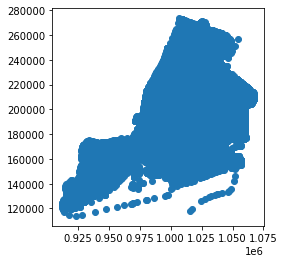

In [32]:
nodes.plot()

In [35]:
gas_new_Br = gas_new[gas_new["BoroughName"]=="BROOKLYN"]
gas_new_Br.shape

(64288, 8)

In [36]:
gas_new.shape

(179133, 8)

In [37]:
streets.shape

(237349, 130)

### Streets

In [20]:
streets = gpd.read_file("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/Infrastructure/Streets/geo_export_0bc8e3d7-f380-4fd2-8672-c55df9b8241a.shp")
streets.head()

,bike_lane,bike_trafd,borocode,date_creat,time_creat,frm_lvl_co,full_stree,l_blkfc_id,l_high_hn,l_low_hn,l_zip,date_modif,time_modif,physicalid,post_direc,post_modif,post_type,pre_direct,pre_modifi,pre_type,r_blkfc_id,r_high_hn,r_low_hn,r_zip,rw_type,segment_ty,shape_leng,snow_pri,st_label,st_name,st_width,status,to_lvl_co,trafdir,geometry
0,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,2.122626e+08,64,50,10280,2017-03-17,00:00:00.000,3.0,None,None,PL,None,None,None,1.222602e+09,63,51,10280,1.0,U,262.777812,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01793 40.70617, -74.01787 40.7..."
1,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,1.222601e+09,82,66,10280,2017-03-17,00:00:00.000,5.0,None,None,PL,None,None,None,1.222605e+09,81,65,10280,1.0,U,259.415989,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01757 40.70684, -74.01712 40.7..."
2,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,1.222601e+09,98,84,10280,2017-03-17,00:00:00.000,6.0,None,None,PL,None,None,None,1.222601e+09,101,83,10280,1.0,U,280.444781,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01712 40.70746, -74.01663 40.7..."
3,None,None,1,2007-11-29,00:00:00.000,13.0,BATTERY PL,2.122626e+08,None,None,10280,2017-07-18,00:00:00.000,8.0,None,None,PL,None,None,None,1.222601e+09,None,None,10280,1.0,U,32.070139,C,BATTERY PL,BATTERY,42.0,2,13.0,TW,"LINESTRING (-74.01694 40.70481, -74.01705 40.7..."
4,None,None,1,2011-04-22,00:00:00.000,13.0,BATTERY PL,2.122626e+08,None,None,10004,2019-04-15,00:00:00.000,14.0,None,None,PL,None,None,None,2.122624e+08,None,None,10004,1.0,T,206.271850,C,BATTERY PL,BATTERY,24.0,2,13.0,TF,"LINESTRING (-74.01429 40.70455, -74.01437 40.7..."


In [21]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 121115 entries, 0 to 121114
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   bike_lane   15262 non-null   object  
 1   bike_trafd  15261 non-null   object  
 2   borocode    121115 non-null  object  
 3   date_creat  121115 non-null  object  
 4   time_creat  121115 non-null  object  
 5   frm_lvl_co  121115 non-null  float64 
 6   full_stree  121115 non-null  object  
 7   l_blkfc_id  121115 non-null  float64 
 8   l_high_hn   84348 non-null   object  
 9   l_low_hn    84348 non-null   object  
 10  l_zip       119737 non-null  object  
 11  date_modif  120854 non-null  object  
 12  time_modif  120854 non-null  object  
 13  physicalid  121115 non-null  float64 
 14  post_direc  1485 non-null    object  
 15  post_modif  683 non-null     object  
 16  post_type   107981 non-null  object  
 17  pre_direct  10008 non-null   object  
 18  pre_modifi  84 n

In [22]:
streets["full_stree"].unique()

array(['BATTERY PL', 'W  THAMES ST', '1 PL', ..., 'MANDY CT',
       'ASTORIA BLVD N EN NORTHERN BLVD',
       'GRAND CENTRAL PARKWAY ET 15 WB'], dtype=object)

In [23]:
nodes = gpd.read_file("C:/Users/Shetty/OneDrive/Desktop/NYU/Independent Study/Infrastructure/Streets/lion/Nodes.shp")
nodes.head()

,OBJECTID_1,OBJECTID,NODEID,GLOBALID,VIntersect,geometry
0,1.0,1,1,{35DEE984-625C-4EB7-8A75-39AF86611792},None,POINT (912935.681 119003.593)
1,2.0,2,2,{430B64C5-B8FD-412E-A05C-956F004DC6B5},None,POINT (913801.147 116956.840)
2,3.0,3,3,{C50A1D48-67BE-4DA1-9FE0-790C25CEF77A},None,POINT (912287.069 120468.607)
3,4.0,4,4,{4DA305AD-BFAD-4611-9699-7C9125ED3963},None,POINT (912292.075 122532.320)
4,5.0,5,5,{4F821377-CB31-47D9-B776-BC4B0C3869F6},None,POINT (912366.475 124500.249)


### Permits to Streets

In [47]:
gas_new.head()

,OnStreetName,FromStreetName,ToStreetName,BoroughName,PermitIssueDate,PermitLinearFeet,ApplicationTypeShortDesc,PermitSeriesShortDesc
85,BUSHWICK AVENUE,BLEECKER STREET,GREENE AVENUE,BROOKLYN,05/31/2022 10:40:15 AM,1.0,Emergency,STREET OPENING PERMIT
98,SCHENECTADY AVENUE,AVENUE M,AVENUE N,BROOKLYN,01/26/2023 02:47:09 PM,1.0,Reissue,STREET OPENING PERMIT
198,WEST 44 STREET,5 AVENUE,6 AVENUE,MANHATTAN,01/02/2019 01:51:14 PM,20.0,New,STREET OPENING PERMIT
200,AVENUE B,EAST 6 STREET,EAST 7 STREET,MANHATTAN,01/14/2019 03:15:52 PM,230.0,New,STREET OPENING PERMIT
206,1 AVENUE,EAST 30 STREET,EAST 33 STREET,MANHATTAN,05/22/2019 08:20:38 AM,4.0,Emergency,STREET OPENING PERMIT


In [48]:
streets_Br.head()

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2020,LCT2020Suf,RCT2020,RCT2020Suf,LCB2020,LCB2020Suf,RCB2020,RCB2020Suf,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,LCB2010,LCB2010Suf,RCB2010,RCB2010Suf,LCT2000,LCT2000Suf,RCT2000,RCT2000Suf,LCB2000,LCB2000Suf,RCB2000,RCB2000Suf,LCT1990,LCT1990Suf,RCT1990,RCT1990Suf,LAssmDist,LElectDist,RAssmDist,RElectDist,SplitElect,LSchlDist,RSchlDist,SplitSchl,LSubSect,RSubSect,SanDistInd,MapFrom,MapTo,BoroBndry,MH_RI_Flag,XFrom,YFrom,XTo,YTo,ArcCenterX,ArcCenterY,CurveFlag,Radius,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,StreetWi_2,BikeLane,BIKE_TRAFD,ACTIVE_FLA,POSTED_SPE,Snow_Prior,Number_Tra,Number_Par,Number_Tot,Carto_Disp,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,L_PD_Servi,R_PD_Servi,TRUCK_ROUT,SHAPE_Leng,boro_code,boro_name,shape_area,shape_le_1,geometry
67290,38921.0,6 AVENUE,None,0,U,None,B,None,T,DOT,None,8828,03180,305680,None,01,None,None,None,None,None,None,None,None,1,0020570,1,X,11220,11220,3.0,3.0,307,307,203,202,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2001,None,118,None,122,None,2001,None,2000,None,118,None,122,None,49,010,51,010,None,20,20,None,4D,4D,None,22A,22A,None,None,980207,171561,980046,171358,0,0,None,0,0013789,0013788,M,M,None,None,1,36519.0,31648.0,None,None,1922605369,1922610304,0020570,2,44.0,44.0,None,None,None,None,25,C,2,2,4,None,None,None,6101,6199,6100,6198,6101,6199,6100,6198,3882801000000,None,None,2,258.632872,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980207.108 171560.987, 980046.406 ..."
67291,38922.0,FORT HAMILTON PARKWAY,None,0,U,None,B,None,T,DOT,None,3684,01500,342630,None,01,None,None,None,None,None,None,None,None,1,0019440,1,X,11228,11228,3.0,3.0,310,310,102,208,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,1001,None,2004,None,206,None,132,None,49,041,49,043,None,20,20,None,4D,4D,None,22A,22A,None,None,980285,167800,980086,167626,0,0,None,0,0013204,0013203,M,M,None,None,1,36569.0,31697.0,None,None,1822606016,1822606319,0019440,2,50.0,54.0,None,None,None,None,25,C,2,2,4,20,None,None,7201,7299,7200,7298,7201,7299,7200,7298,3368401000000,None,None,None,264.304804,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980284.792 167799.751, 980086.019 ..."
67292,38923.0,53 STREET,None,0,U,None,B,None,A,DOT,None,9240,01050,309230,None,01,None,None,None,None,None,None,None,None,1,0161652,1,None,11220,11220,3.0,3.0,307,307,101,103,76,None,76,None,1001,None,1002,None,76,None,76,None,1001,None,1002,None,76,None,76,None,1000,None,1002,None,76,None,76,None,51,011,51,011,None,15,15,None,4D,4D,None,22A,22A,None,None,980291,174178,980902,173694,0,0,None,0,0080039,0013802,M,M,None,None,1,36634.0,31760.0,None,None,1922608678,1922604370,0161652,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,401,499,400,498,401,499,400,498,3924001000000,None,None,None,779.215967,3.0,Brooklyn,1.934229e+09,728263.543413,"LINESTRING (980291.143 174178.075, 980901.565 ..."
67293,38924.0,88 STREET,None,0,U,None,B,None,W,DOT,None,9444,02010,310980,None,01,None,None,None,None,None,None,None,None,1,0017143,1,None,11228,11228,3.0,3.0,310,310,102,103,152,None,152,None,3000,None,3003,None,152,None,152,None,3000,None,3003,None,158,None,158,None,1001,None,1002,None,158,None,158,None,46,022,46,022,None,20,20,None,3E,3E,None,22B,22B,None,None,977689,164627,977939,164463,0,0,None,0,0011776,0011779,M,M,None,None,1,36661.0,31783.0,None,None,1822603937,1822601237,0017143,2,30.0,30.0,None,None,None,None,25,S,1,2,3,None,None,None,623,651,624,652,623,651,624,652,3944401000000,None,None,None,298.889658,3.0,Brooklyn

In [50]:
streets_Br_new = streets_Br[["OBJECTID","Street","NodeIDFrom","NodeIDTo","StreetWidt","geometry"]]
streets_Br_new.head()

,OBJECTID,Street,NodeIDFrom,NodeIDTo,StreetWidt,geometry
67290,38921.0,6 AVENUE,0013789,0013788,44.0,"LINESTRING (980207.108 171560.987, 980046.406 ..."
67291,38922.0,FORT HAMILTON PARKWAY,0013204,0013203,50.0,"LINESTRING (980284.792 167799.751, 980086.019 ..."
67292,38923.0,53 STREET,0080039,0013802,30.0,"LINESTRING (980291.143 174178.075, 980901.565 ..."
67293,38924.0,88 STREET,0011776,0011779,30.0,"LINESTRING (977688.875 164627.212, 977938.855 ..."
67294,38925.0,7 AVENUE,0011894,0011893,42.0,"LINESTRING (979076.119 167735.630, 978986.868 ..."


In [49]:
nodes_Br.head()

,OBJECTID_1,OBJECTID,NODEID,GLOBALID,VIntersect,boro_code,boro_name,shape_area,shape_leng,geometry
40964,10690.0,10867,11360,{3599D936-BA82-471F-938F-A0854BCEE3ED},None,3.0,Brooklyn,1.934229e+09,728263.543413,POINT (975521.405 159888.673)
40965,10691.0,10868,11362,{7370BBD0-A2C7-42BD-ADC3-3527E81F23F0},None,3.0,Brooklyn,1.934229e+09,728263.543413,POINT (975917.658 159724.692)
40966,10692.0,10869,11363,{24E89653-CAB0-49AA-A3BA-1E8CAA0013B2},None,3.0,Brooklyn,1.934229e+09,728263.543413,POINT (975922.490 159735.894)
40967,10693.0,10870,11364,{8C51D34D-3FF4-494D-9DAC-DBDA3F94F978},None,3.0,Brooklyn,1.934229e+09,728263.543413,POINT (975963.559 159821.066)
40968,10694.0,10871,11365,{F1082EFC-5779-4A66-B1BF-9664E7563CDA},None,3.0,Brooklyn,1.934229e+09,728263.543413,POINT (976111.595 159549.499)


In [54]:
permits_streets_01 = gas_new.merge(streets_Br, left_on="FromStreetName", right_on = "Street")

MemoryError: Unable to allocate 336. MiB for an array with shape (7, 6295769) and data type object

In [53]:
permits_streets_01 = gas_new.merge(streets_Br, left_on="FromStreetName", right_on = "Street")
permits_streets_02 = gas_new.merge(streets_Br, left_on="OnStreetName", right_on = "Street")
permits_streets_03 = gas_new.merge(streets_Br, left_on="ToStreetName", right_on = "Street")

MemoryError: Unable to allocate 1.36 GiB for an array with shape (29, 6295769) and data type object

In [ ]:
permits_streets_01.

In [ ]:
# Perform a spatial join between the permits and streets dataframes
permits_streets = gpd.sjoin(gas_new, streets_Br, op='intersects')

# Select the columns of interest
permits_geometry = permits_geometry[['OnStreetName', 'FromStreetName', 'ToStreetName', 'geometry']]

# Filter the rows where the logic conditions are met
permits_geometry = permits_geometry[
    (permits_geometry['FromStreetName_NodeIDTo'] == permits_geometry['OnStreetName_NodeIDFrom']) &
    (permits_geometry['OnStreetName_NodeIDTo'] == permits_geometry['ToStreetName_NodeIDFrom'])
]

# Reset the index and drop the original index column
permits_geometry = permits_geometry.reset_index().drop('index', axis=1)
